In [10]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Importing the dataset**

In [12]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [14]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

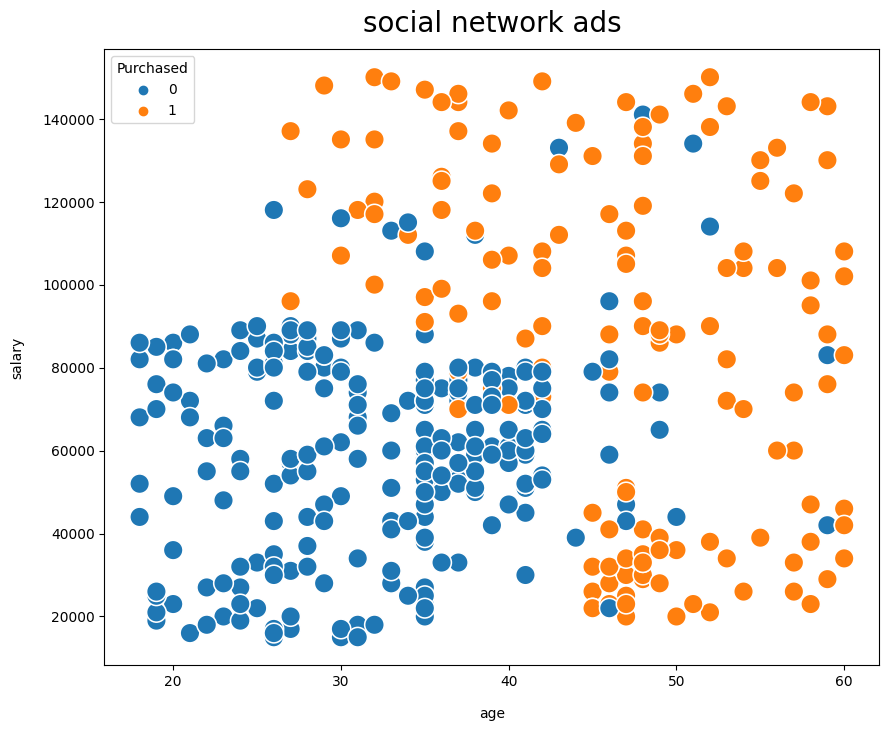

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.title("social network ads", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("salary", labelpad=13)
ax = plt.gca()

In [16]:
del df['User ID']

In [17]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})

In [18]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [19]:
X = df[['Gender', 'Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

**Predicting the Test set results**

In [23]:
x_pred=knn.predict(X_test)

In [24]:
x_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [25]:
knn.score(X_test, y_test)

0.93

**Making the Confusion Matrix**

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

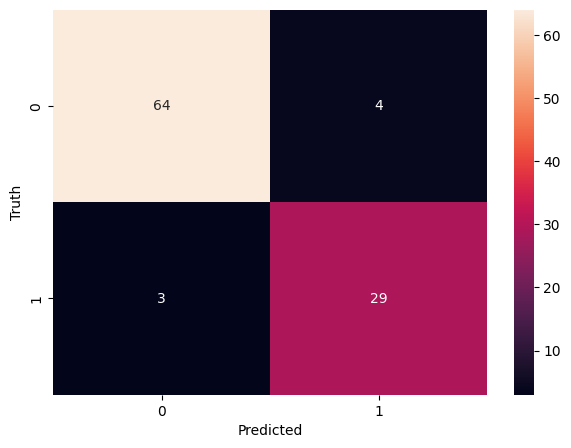

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')